In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar una imagen en modo BGR
img = cv2.imread('img_objectos.jpeg')

In [2]:
img.shape

(1600, 1200, 3)

In [3]:
img

array([[[ 19,  25,  32],
        [ 20,  26,  33],
        [ 20,  26,  33],
        ...,
        [ 48,  54,  53],
        [ 40,  46,  45],
        [ 33,  39,  38]],

       [[ 19,  25,  32],
        [ 20,  26,  33],
        [ 20,  26,  33],
        ...,
        [ 43,  49,  48],
        [ 37,  43,  42],
        [ 32,  38,  37]],

       [[ 19,  25,  32],
        [ 20,  26,  33],
        [ 20,  26,  33],
        ...,
        [ 32,  38,  37],
        [ 28,  34,  33],
        [ 27,  33,  32]],

       ...,

       [[ 37, 103,  78],
        [ 39, 106,  79],
        [ 43, 109,  84],
        ...,
        [  0, 138, 167],
        [  0, 138, 167],
        [  0, 138, 167]],

       [[ 44,  95,  75],
        [ 42,  94,  71],
        [ 40,  91,  71],
        ...,
        [  0, 138, 167],
        [  0, 138, 167],
        [  0, 138, 167]],

       [[ 42,  87,  68],
        [ 39,  84,  65],
        [ 37,  79,  61],
        ...,
        [  0, 138, 167],
        [  0, 138, 167],
        [  0, 138, 167]]

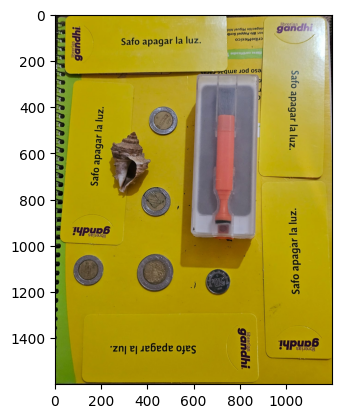

In [4]:
# Convertir BGR a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen usando matplotlib
plt.imshow(img_rgb)

In [5]:
# Separar los canales de color
B, G, R = cv2.split(img)
R

array([[ 32,  33,  33, ...,  53,  45,  38],
       [ 32,  33,  33, ...,  48,  42,  37],
       [ 32,  33,  33, ...,  37,  33,  32],
       ...,
       [ 78,  79,  84, ..., 167, 167, 167],
       [ 75,  71,  71, ..., 167, 167, 167],
       [ 68,  65,  61, ..., 167, 167, 167]], dtype=uint8)

In [6]:
R.shape

(1600, 1200)

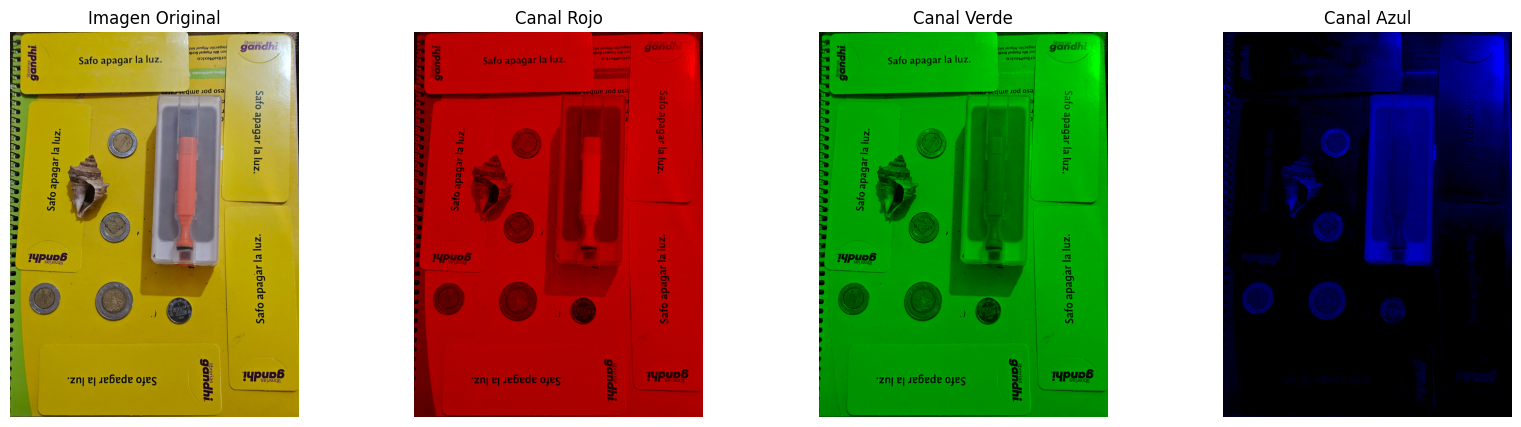

In [7]:
# Crear una imagen en negro con el mismo tamaño
zeros = np.zeros(img.shape[:2], dtype="uint8")

# Crear imágenes para cada canal de color
img_red = cv2.merge([R, zeros, zeros])
img_green = cv2.merge([zeros, G, zeros])
img_blue = cv2.merge([zeros, zeros, B])

# Visualizar los canales individuales y la imagen original
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Convertir BGR a RGB para matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Imagen original
axes[0].imshow(img_rgb)
axes[0].set_title('Imagen Original')
axes[0].axis('off')

# Canal Rojo
axes[1].imshow(img_red)
axes[1].set_title('Canal Rojo')
axes[1].axis('off')

# Canal Verde
axes[2].imshow(img_green)
axes[2].set_title('Canal Verde')
axes[2].axis('off')

# Canal Azul
axes[3].imshow(img_blue)
axes[3].set_title('Canal Azul')
axes[3].axis('off')

plt.show()

In [8]:
img_green.min(axis=0)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [9]:
img_blue + img_green

array([[[  0,  25,  19],
        [  0,  26,  20],
        [  0,  26,  20],
        ...,
        [  0,  54,  48],
        [  0,  46,  40],
        [  0,  39,  33]],

       [[  0,  25,  19],
        [  0,  26,  20],
        [  0,  26,  20],
        ...,
        [  0,  49,  43],
        [  0,  43,  37],
        [  0,  38,  32]],

       [[  0,  25,  19],
        [  0,  26,  20],
        [  0,  26,  20],
        ...,
        [  0,  38,  32],
        [  0,  34,  28],
        [  0,  33,  27]],

       ...,

       [[  0, 103,  37],
        [  0, 106,  39],
        [  0, 109,  43],
        ...,
        [  0, 138,   0],
        [  0, 138,   0],
        [  0, 138,   0]],

       [[  0,  95,  44],
        [  0,  94,  42],
        [  0,  91,  40],
        ...,
        [  0, 138,   0],
        [  0, 138,   0],
        [  0, 138,   0]],

       [[  0,  87,  42],
        [  0,  84,  39],
        [  0,  79,  37],
        ...,
        [  0, 138,   0],
        [  0, 138,   0],
        [  0, 138,   0]]

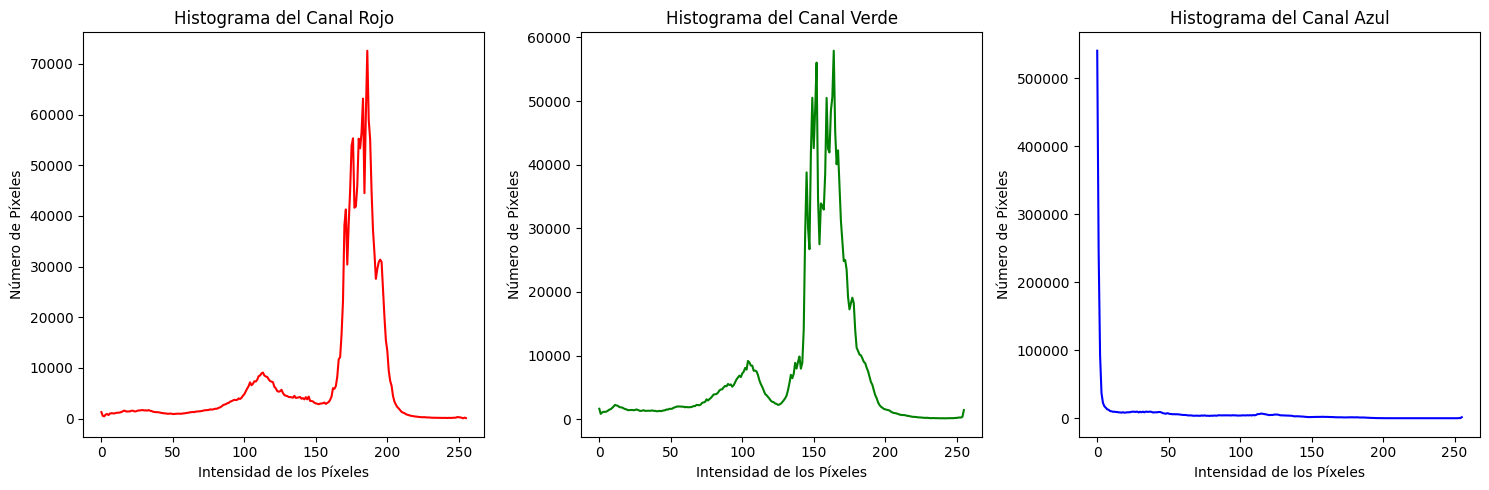

In [10]:
# Calcular el histograma para cada canal
hist_B = cv2.calcHist([B], [0], None, [256], [0, 256])
hist_G = cv2.calcHist([G], [0], None, [256], [0, 256])
hist_R = cv2.calcHist([R], [0], None, [256], [0, 256])

# Visualizar los histogramas
plt.figure(figsize=(15, 5))

plt.subplot(133)
plt.plot(hist_B, color='blue')
plt.title('Histograma del Canal Azul')
plt.xlabel('Intensidad de los Píxeles')
plt.ylabel('Número de Píxeles')

plt.subplot(132)
plt.plot(hist_G, color='green')
plt.title('Histograma del Canal Verde')
plt.xlabel('Intensidad de los Píxeles')
plt.ylabel('Número de Píxeles')

plt.subplot(131)
plt.plot(hist_R, color='red')
plt.title('Histograma del Canal Rojo')
plt.xlabel('Intensidad de los Píxeles')
plt.ylabel('Número de Píxeles')

plt.tight_layout()
plt.show()

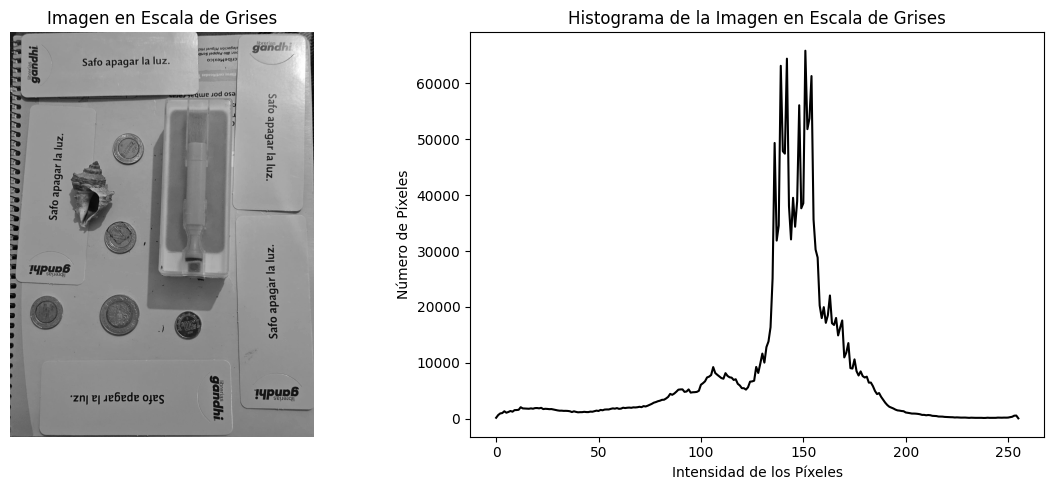

In [11]:
# Convertir la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calcular el histograma para la imagen en escala de grises
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Visualizar la imagen en escala de grises y su histograma
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')

plt.subplot(122)
plt.plot(hist_gray, color='black')
plt.title('Histograma de la Imagen en Escala de Grises')
plt.xlabel('Intensidad de los Píxeles')
plt.ylabel('Número de Píxeles')

plt.tight_layout()
plt.show()

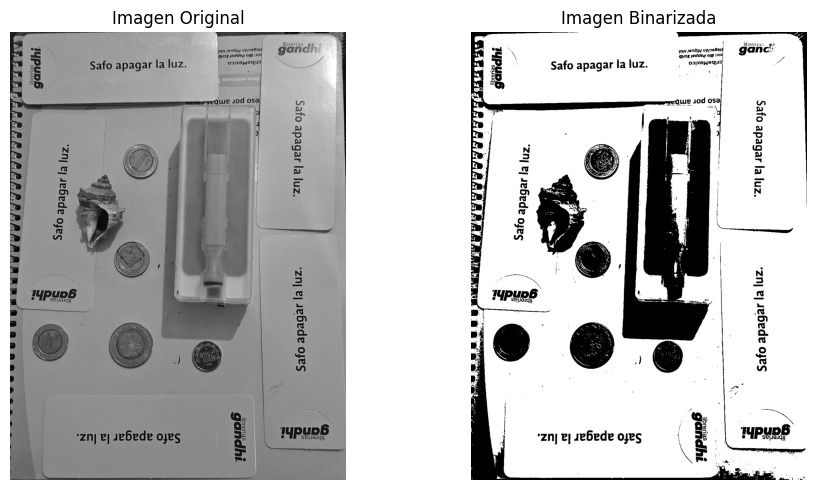

In [12]:
# Aplicar la binarización con un umbral específico
_, binary_img = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Mostrar la imagen original y la imagen binarizada
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(binary_img, cmap='gray')
plt.title('Imagen Binarizada')
plt.axis('off')

plt.tight_layout()
plt.show()

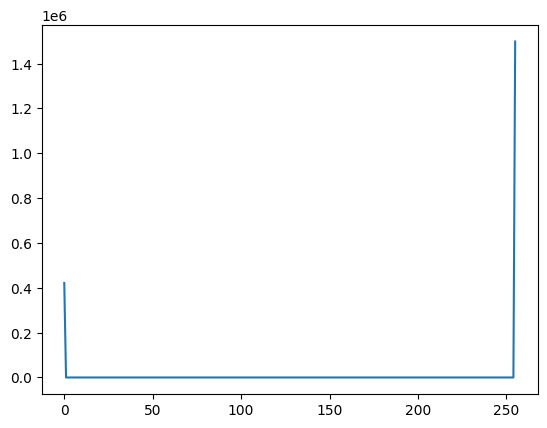

In [13]:
hist_binary = cv2.calcHist([binary_img], [0], None, [256], [0, 256])
plt.plot(hist_binary)

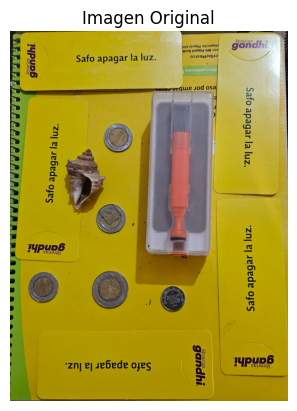

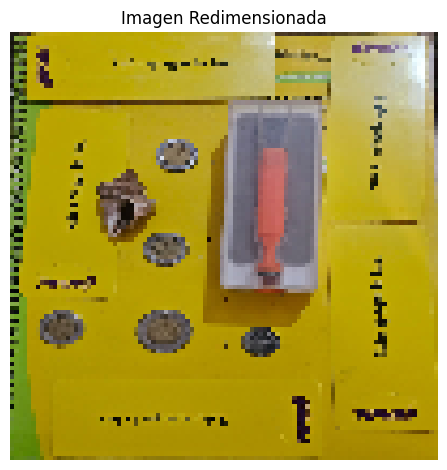

In [14]:
# Redimensionar la imagen
resized_img = cv2.resize(img, (100, 100))

# Mostrar la imagen original y la redimensionada
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Redimensionada')
plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
img.shape

(1600, 1200, 3)

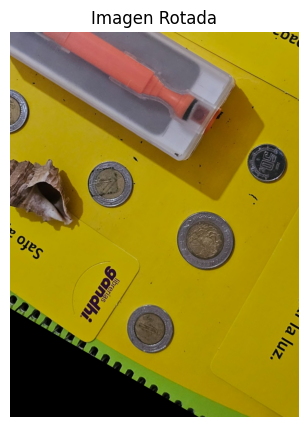

In [16]:
(h, w) = img.shape[:2]
center = (w // 4, h // 2)
angle = 60
scale = 1.5

M = cv2.getRotationMatrix2D(center, angle, scale)
rotated_img = cv2.warpAffine(img, M, (w, h))

# Mostrar la imagen rotada
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Rotada')
plt.axis('off')
plt.show()

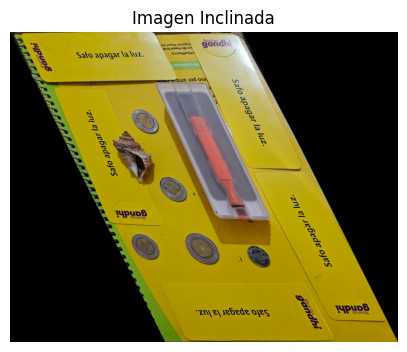

In [17]:
shear_factor = 0.5
M = np.float32([[1, shear_factor, 0], [0, 1, 0]])

sheared_img = cv2.warpAffine(img, M, (w + int(h * shear_factor), h))

# Mostrar la imagen inclinada
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(sheared_img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Inclinada')
plt.axis('off')
plt.show()

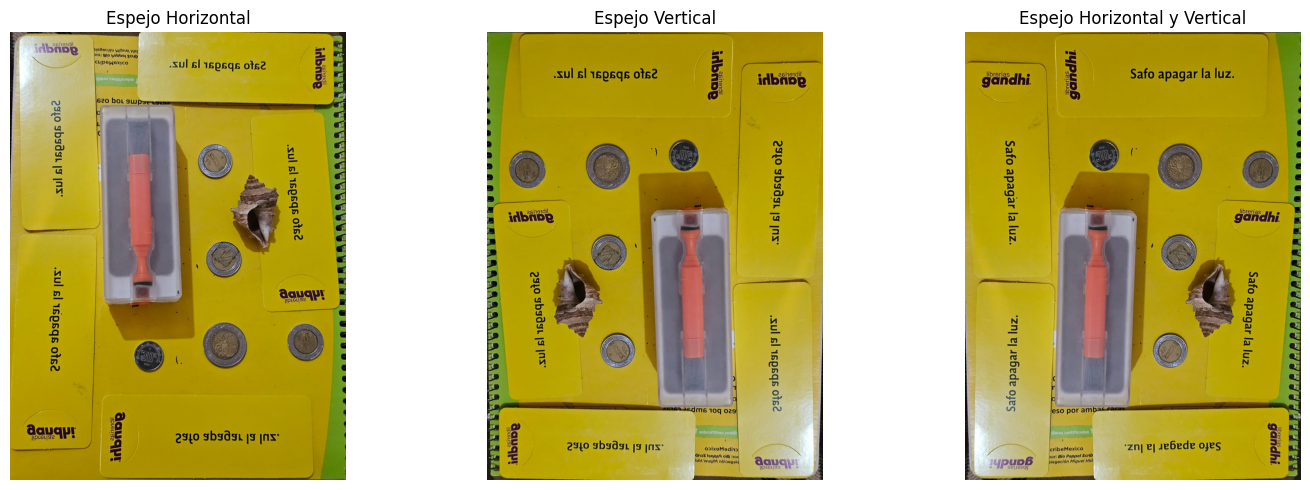

In [18]:
# Espejo horizontal
flipped_horizontally = cv2.flip(img, 1)

# Espejo vertical
flipped_vertically = cv2.flip(img, 0)

# Espejo horizontal y vertical
flipped_both = cv2.flip(img, -1)

# Mostrar las imágenes espejadas
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv2.cvtColor(flipped_horizontally, cv2.COLOR_BGR2RGB))
plt.title('Espejo Horizontal')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(flipped_vertically, cv2.COLOR_BGR2RGB))
plt.title('Espejo Vertical')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(flipped_both, cv2.COLOR_BGR2RGB))
plt.title('Espejo Horizontal y Vertical')
plt.axis('off')

plt.tight_layout()
plt.show()

In [19]:
# Gaussiano
h, w, ch= img.shape
mean = 127
var = 8
sigma = var ** 0.5
gauss = np.random.normal(mean, sigma, (h, w, ch))
gauss = gauss.reshape(h,w,ch)
print(gauss)

gaussian = img + gauss
gaussian = np.round(gaussian)

# Guardar imagen
cv2.imwrite('/content/gaussian.jpg', gaussian, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

[[[124.33909788 127.80997635 123.4263595 ]
  [128.05252127 124.6766164  123.07266129]
  [124.22239416 126.71080161 126.8048429 ]
  ...
  [129.51128728 124.08642259 124.64868674]
  [131.30746309 123.83354508 126.96694072]
  [129.18086004 125.51477649 127.78508231]]

 [[126.41379303 129.89818737 126.60896001]
  [128.42673145 127.69788774 127.95309221]
  [125.67265452 126.22874392 132.07391685]
  ...
  [128.05966215 127.38998537 126.65946898]
  [131.46986717 131.84661789 126.17511776]
  [126.14808862 127.35274541 124.37200106]]

 [[129.69710357 128.3085313  123.15038564]
  [127.05555348 124.46229012 129.81819023]
  [127.83271503 125.51479717 128.7123274 ]
  ...
  [130.17687652 121.37443432 129.10581937]
  [125.47729088 124.33096198 125.69601846]
  [125.58118176 130.61088987 130.53230991]]

 ...

 [[129.91394344 128.08437999 126.96338585]
  [130.95012743 129.01982769 123.31535287]
  [126.44425846 126.40750709 129.69123282]
  ...
  [132.21907089 130.45003344 127.76712632]
  [128.99159679 12

False

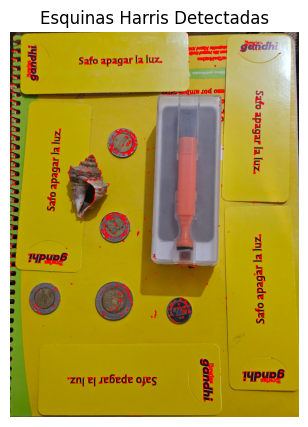

In [20]:
img_border = img.copy()

# Aplicar la detección de esquinas Harris
dst = cv2.cornerHarris(gray, 2, 3, 0.01)

# Dilatar el resultado para marcar mejor las esquinas
dst = cv2.dilate(dst, None)

# Umbral para marcar las esquinas en la imagen original
img_border[dst > 0.01 * dst.max()] = [0, 0, 255]

# Mostrar la imagen con las esquinas detectadas
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(img_border, cv2.COLOR_BGR2RGB))
plt.title('Esquinas Harris Detectadas')
plt.axis('off')
plt.show()

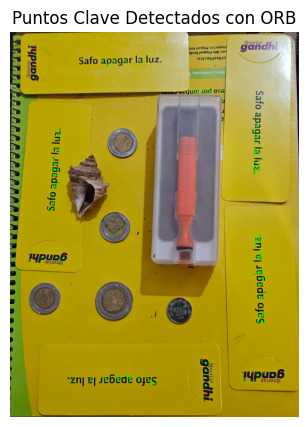

In [21]:
# Crear un detector ORB
orb = cv2.ORB_create()

# Detectar puntos clave y computar descriptores
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Dibujar los puntos clave detectados
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)

# Mostrar la imagen con los puntos clave detectados
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Puntos Clave Detectados con ORB')
plt.axis('off')
plt.show()

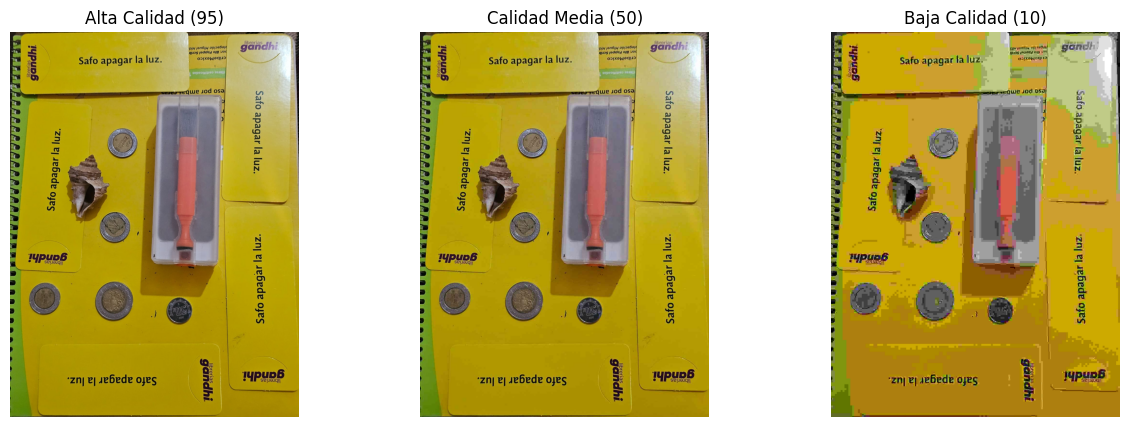

In [22]:
# Cargar la imagen
img = cv2.imread('img_objectos.jpeg')

# Guardar la imagen con diferentes niveles de calidad
cv2.imwrite('img_objectos_high_quality.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 95])
cv2.imwrite('img_objectos_medium_quality.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 30])
cv2.imwrite('img_objectos_low_quality.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 1])

# Cargar las imágenes comprimidas
img_high = cv2.imread('img_objectos_high_quality.jpg')
img_medium = cv2.imread('img_objectos_medium_quality.jpg')
img_low = cv2.imread('img_objectos_low_quality.jpg')

# Convertir BGR a RGB para matplotlib
img_high = cv2.cvtColor(img_high, cv2.COLOR_BGR2RGB)
img_medium = cv2.cvtColor(img_medium, cv2.COLOR_BGR2RGB)
img_low = cv2.cvtColor(img_low, cv2.COLOR_BGR2RGB)

# Mostrar las imágenes comprimidas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img_high)
axes[0].set_title('Alta Calidad (95)')
axes[0].axis('off')

axes[1].imshow(img_medium)
axes[1].set_title('Calidad Media (50)')
axes[1].axis('off')

axes[2].imshow(img_low)
axes[2].set_title('Baja Calidad (10)')
axes[2].axis('off')

plt.show()

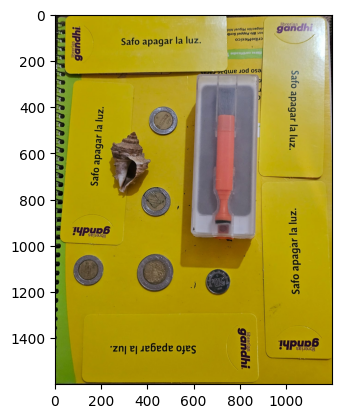

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = cv2.imread('img_objectos.jpeg') #('/content/coins-orig.jpg')
# Convertir BGR a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen usando matplotlib
plt.imshow(img_rgb)
plt.show()

(array([183.,  35.,  12.,   4.,   4.,   8.,   0.,   4.,   2.,   4.]),
 array([   76.,  6650., 13224., 19798., 26372., 32946., 39520., 46094.,
        52668., 59242., 65816.]),
 <BarContainer object of 10 artists>)

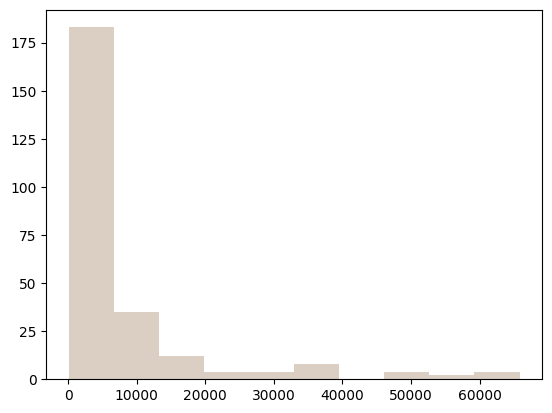

In [24]:
# Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Aplicar desenfoque Gaussiano
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
hist_blurred = cv2.calcHist([gray], [0], None, [256], [0, 256])

plt.show()
plt.hist(hist_gray, alpha = 0.2)
plt.hist(hist_blurred, alpha = 0.2)

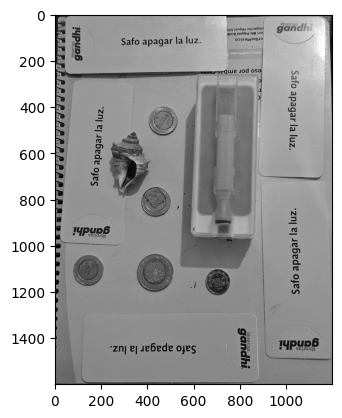

In [25]:
# Mostrar la imagen usando matplotlib
plt.imshow(gray, cmap='gray')
plt.show()

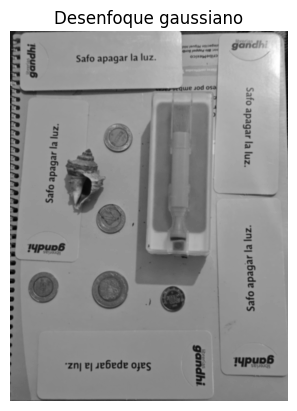

In [26]:
plt.imshow(blurred, cmap='gray')
plt.title('Desenfoque gaussiano')
plt.axis('off')
plt.show()

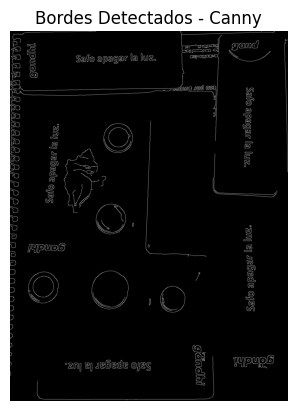

In [27]:
# Detectar bordes usando el detector de Canny
edges = cv2.Canny(blurred, 30, 150)

plt.imshow(edges, cmap='gray')
plt.title('Bordes Detectados - Canny')
plt.axis('off')
plt.show()

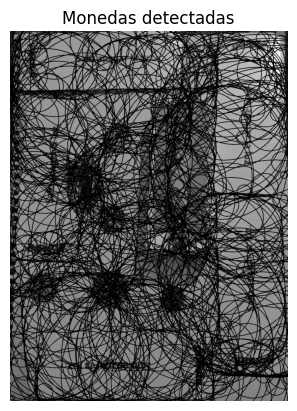

In [28]:
img_circles = blurred.copy()
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.5, minDist=50,
                           param1=10, param2=5, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img_circles,(i[0],i[1]),i[2],(0,255,0),2)

# Mostrar la imagen original con los círculos detectados
plt.imshow(cv2.cvtColor(img_circles, cv2.COLOR_BGR2RGB))
plt.title('Monedas detectadas')
plt.axis('off')
plt.show()

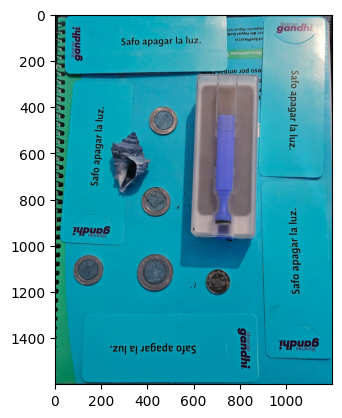

In [29]:
img_bc = cv2.imread('img_objectos.jpeg')

plt.figure()
plt.imshow(img_bc)
plt.show()

In [30]:
img_bc.shape

(1600, 1200, 3)

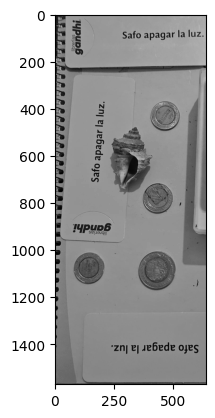

In [31]:
img_bc_gray = cv2.cvtColor(img_bc, cv2.COLOR_BGR2GRAY)
img_bc_cropped = img_bc_gray[
    30:2369 // 7 * 6, # alto
    0:1770 // 3 + 50 # ancho
    ]
plt.imshow(img_bc_cropped, cmap='gray')

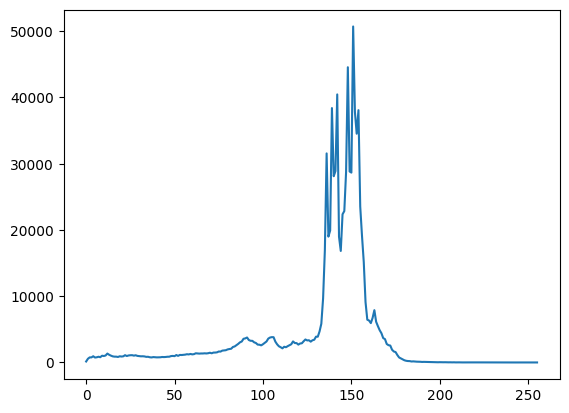

In [32]:
import os

# Calculamos el histograma de la imagen
hist_binary = cv2.calcHist([img_bc_cropped], [0], None, [256], [0, 256])
plt.plot(hist_binary)

In [33]:
img_bc_cropped

array([[ 26,  27,  28, ..., 168, 167, 166],
       [ 25,  26,  28, ..., 168, 167, 166],
       [ 27,  27,  27, ..., 165, 166, 167],
       ...,
       [ 88,  90,  94, ...,  85,  85,  84],
       [ 83,  81,  79, ..., 102, 102, 100],
       [ 76,  73,  69, ..., 109, 109, 107]], dtype=uint8)

In [34]:
img_bc_cropped[(img_bc_cropped > 50) & (img_bc_cropped < 150)]

array([130, 145, 145, ..., 109, 109, 107], dtype=uint8)

In [35]:
# Pixeles entre 50 y 150
bc_range = (img_bc_cropped > 50) & (img_bc_cropped < 150)
negros = img_bc_cropped < 20
bc_range
# Convertir booleanos a enteros
bc_range = 1 * bc_range

bc_range = np.where((bc_range==0)|(bc_range==1), bc_range ^ 1, bc_range)
bc_range = 255 * bc_range
# Es importante convertir los valores a uint8 (que es el formato usado para las imágenes
# por OpenCV)
# https://stackoverflow.com/a/46689933/25293154
bc_range = bc_range.astype(np.uint8)
bc_range

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [36]:
# Crear una imagen en negro con el mismo tamaño
zeros = np.zeros(bc_range.shape, dtype="uint8")
zeros

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

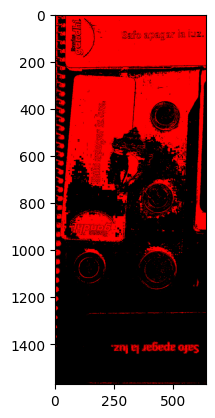

In [37]:
# Crear imágenes para cada canal de color
img_red = cv2.merge([bc_range, zeros, zeros])
plt.imshow(img_red, cmap='gray')

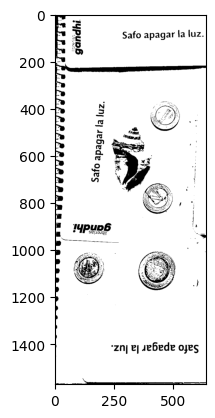

In [38]:
ret,thresh3 = cv2.threshold(img_bc_cropped,80,81,cv2.THRESH_BINARY)
plt.imshow(thresh3, cmap='gray')